## Long Term Assigment Ar'rasyah Ilhamdani

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Long Term

/content/drive/MyDrive/Colab Notebooks/Long Term


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data_churn = pd.read_csv('telco_churn.csv')

In [ ]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Check value for each Column

In [ ]:
col_check = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract','Churn','TotalCharges']
for column in col_check:
    print('\033[1m' +column+' unique values: '+'\033[0m')
    print(data_churn[column].sort_values().unique())

gender unique values: 
['Female' 'Male']
Partner unique values: 
['No' 'Yes']
Dependents unique values: 
['No' 'Yes']
PhoneService unique values: 
['No' 'Yes']
MultipleLines unique values: 
['No' 'No phone service' 'Yes']
InternetService unique values: 
['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values: 
['No' 'No internet service' 'Yes']
OnlineBackup unique values: 
['No' 'No internet service' 'Yes']
DeviceProtection unique values: 
['No' 'No internet service' 'Yes']
TechSupport unique values: 
['No' 'No internet service' 'Yes']
StreamingTV unique values: 
['No' 'No internet service' 'Yes']
StreamingMovies unique values: 
['No' 'No internet service' 'Yes']
PaymentMethod unique values: 
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Contract unique values: 
['Month-to-month' 'One year' 'Two year']
Churn unique values: 
['No' 'Yes']
TotalCharges unique values: 
[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9']


In [ ]:
data_churn.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
zero_tc = data_churn.query('TotalCharges == " "')
zero_tc["tenure"].value_counts()

0    11
Name: tenure, dtype: int64

In [ ]:
data_churn['TotalCharges'] = np.where(data_churn['TotalCharges'] == ' ',0,data_churn['TotalCharges'])

# Checking duplicate value

In [ ]:
len(data_churn.drop_duplicates()) / len(data_churn)

1.0

# Begining of EDA

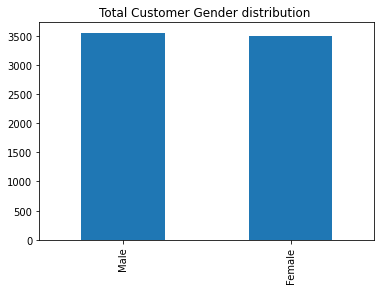

In [ ]:
data_churn['gender'].value_counts().plot(kind='bar')
plt.title("Total Customer Gender distribution ")

plt.show()

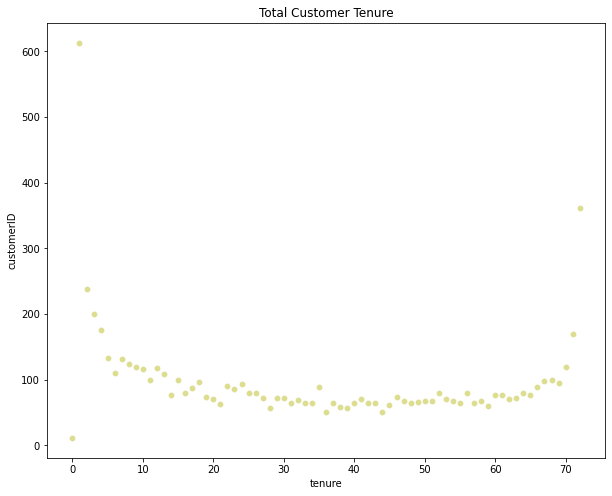

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,8))

g1 = data_churn.groupby( ["tenure"] ).count()

sns.scatterplot(x="tenure", y="customerID" , color='tab:olive' , sizes=(40, 400), alpha=.5, palette="muted",  data=g1)
plt.title("Total Customer Tenure")

plt.show()

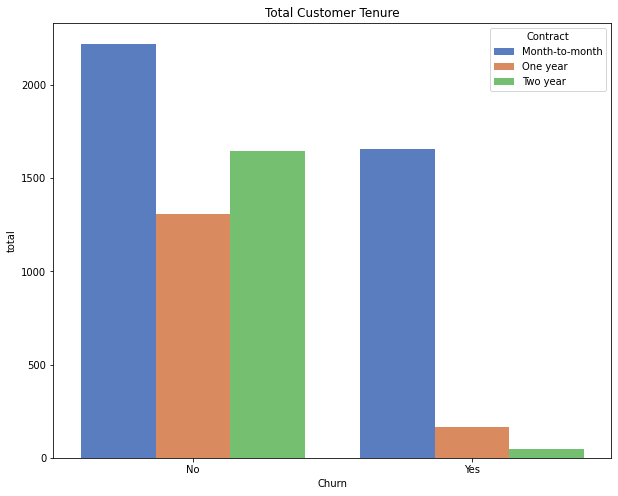

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,8))

g2 = data_churn.groupby('Contract')["Churn"].value_counts().reset_index(name='total')

sns.barplot(x="Churn", y="total"  , hue='Contract', palette="muted",  data=g2)
plt.title("Total Customer Tenure")

plt.show()

In [ ]:
fig = px.box(data_churn, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

# Encoding the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in data_churn:
    data_churn[feat] = le.fit_transform(data_churn[feat].astype(str))

data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3662,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,618,6257,0
1,1725,1,0,0,0,6,1,0,0,2,0,2,0,0,0,1,3,932,4078,0
2,6850,1,0,0,0,28,1,0,0,2,2,0,0,0,0,0,3,846,5497,1
3,3883,1,0,0,0,22,0,1,0,2,0,2,2,0,0,1,0,269,3188,0
4,5221,0,0,0,0,28,1,0,1,0,0,0,0,0,0,0,2,1498,5620,1


# Unused section

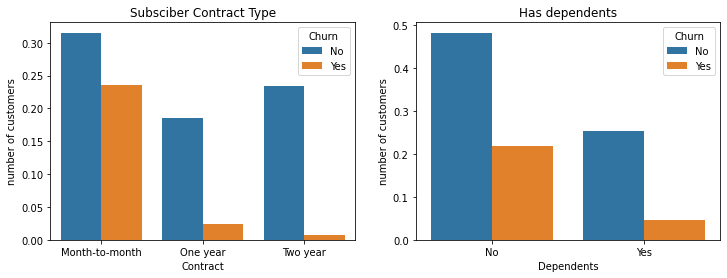

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Subsciber Contract Type")
axis[1].set_title("Has dependents")
axis_y = "number of customers"
# Plot Partner column
customer_contract = data_churn.groupby('Contract')["Churn"].value_counts()/len(data_churn)
customer_contract = customer_contract.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Contract', y= axis_y, hue='Churn', data=customer_contract, ax=axis[0])

# Plot Dependents column
gp_dep = data_churn.groupby('Dependents')["Churn"].value_counts()/len(data_churn)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])